In [4]:
import pandas as pd
import numpy as np

from collections import Counter
from collections import OrderedDict
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
import xgboost as xg
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

In [11]:
dataset = pd.read_csv('car_price_prediction.csv')

In [13]:
dataset.head(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12
7,45816158,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
8,45641395,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


In [15]:
dataset.shape

(19237, 18)

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

***Here, the columns - Manufacturer, Model, Category, Leather interior, Fuel type, Gear box type, Drive wheels, Doors, Wheel, Color are categorical. Hence, we modify the datatype of these columns to category.****

In [21]:
dataset.Manufacturer = dataset.Manufacturer.astype('category')
dataset.Model = dataset.Model.astype('category')
dataset.Category = dataset.Category.astype('category')
dataset['Leather interior'] = dataset['Leather interior'].astype('category')
dataset['Fuel type'] = dataset['Fuel type'].astype('category')
dataset['Gear box type'] = dataset['Gear box type'].astype('category')
dataset['Drive wheels'] = dataset['Drive wheels'].astype('category')
dataset.Doors = dataset.Doors.astype('category')
dataset.Wheel = dataset.Wheel.astype('category')
dataset.Color = dataset.Color.astype('category')

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ID                19237 non-null  int64   
 1   Price             19237 non-null  int64   
 2   Levy              19237 non-null  object  
 3   Manufacturer      19237 non-null  category
 4   Model             19237 non-null  category
 5   Prod. year        19237 non-null  int64   
 6   Category          19237 non-null  category
 7   Leather interior  19237 non-null  category
 8   Fuel type         19237 non-null  category
 9   Engine volume     19237 non-null  object  
 10  Mileage           19237 non-null  object  
 11  Cylinders         19237 non-null  float64 
 12  Gear box type     19237 non-null  category
 13  Drive wheels      19237 non-null  category
 14  Doors             19237 non-null  category
 15  Wheel             19237 non-null  category
 16  Color             1923

In [23]:
#Missing Values

In [24]:
print('Missing values in the dataset:\n')
for each_column in dataset.columns:
    print('Column: {} - {}'.format(each_column, list(dataset[each_column]).count('-')))

Missing values in the dataset:

Column: ID - 0
Column: Price - 0
Column: Levy - 5819
Column: Manufacturer - 0
Column: Model - 0
Column: Prod. year - 0
Column: Category - 0
Column: Leather interior - 0
Column: Fuel type - 0
Column: Engine volume - 0
Column: Mileage - 0
Column: Cylinders - 0
Column: Gear box type - 0
Column: Drive wheels - 0
Column: Doors - 0
Column: Wheel - 0
Column: Color - 0
Column: Airbags - 0


In [25]:
### Replacing the '-' to NA's in the column - Levy

dataset['Levy'] = [np.nan if value == '-' else float(value) for value in dataset['Levy']]
dataset['Levy'].isnull().sum()

5819

In [27]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,19237.0,4.557654e+07,936591.422799,20746880.0,45698374.0,45772308.0,45802036.0,45816654.0
Price,19237.0,1.855593e+04,190581.269684,1.0,5331.0,13172.0,22075.0,26307500.0
Levy,13418.0,9.068381e+02,461.867051,87.0,640.0,781.0,1058.0,11714.0
Prod. year,19237.0,2.010913e+03,5.668673,1939.0,2009.0,2012.0,2015.0,2020.0
Cylinders,19237.0,4.582991e+00,1.199933,1.0,4.0,4.0,4.0,16.0
Airbags,19237.0,6.582627e+00,4.320168,0.0,4.0,6.0,12.0,16.0


In [28]:
### Value counts of the column - Category
category_count = dataset['Category'].value_counts(dropna = False)
category_count

Sedan          8736
Jeep           5473
Hatchback      2847
Minivan         647
Coupe           532
Universal       364
Microbus        306
Goods wagon     233
Pickup           52
Cabriolet        36
Limousine        11
Name: Category, dtype: int64

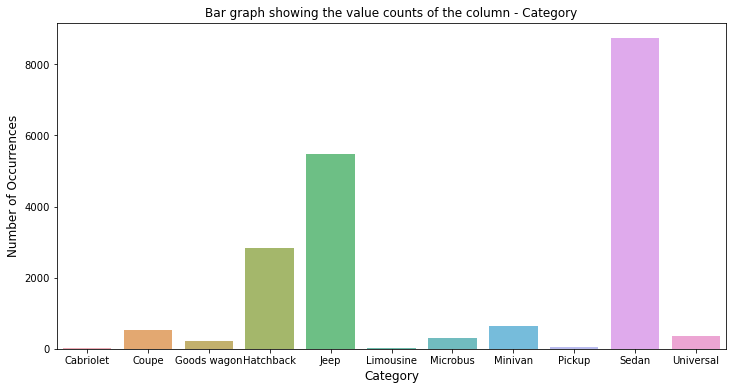

In [38]:
plt.figure(figsize = (12, 6))
sns.barplot(category_count.index, category_count.values, alpha = 0.8)
plt.title('Bar graph showing the value counts of the column - Category')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Category', fontsize = 12)
plt.show()

In [39]:
### Bar graph showing the value counts of the column - Leather interior

In [40]:
interior_count = dataset['Leather interior'].value_counts(dropna = False)
interior_count

Yes    13954
No      5283
Name: Leather interior, dtype: int64

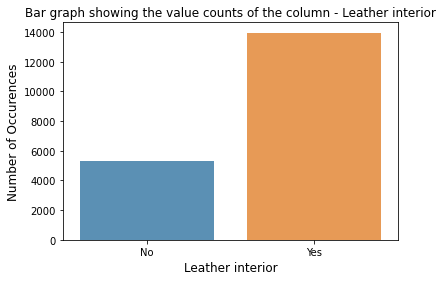

In [42]:
sns.barplot(interior_count.index, interior_count.values, alpha = 0.8)
plt.title('Bar graph showing the value counts of the column - Leather interior')
plt.ylabel('Number of Occurences', fontsize = 12)
plt.xlabel('Leather interior', fontsize = 12)
plt.show()

From the above graph, we can see that most of the cars have a leather interior.

In [44]:
mean_price_interior = dataset[['Leather interior', 'Price']].groupby('Leather interior', as_index = False).mean()
mean_price_interior

,Leather interior,Price
0,No,18322.323301
1,Yes,18644.369930


<function matplotlib.pyplot.show(close=None, block=None)>

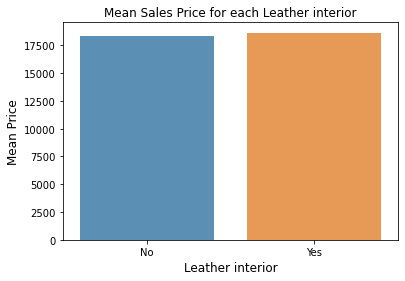

In [54]:
sns.barplot(mean_price_interior['Leather interior'],
           mean_price_interior['Price'], alpha = 0.8)
plt.title('Mean Sales Price for each Leather interior')
plt.ylabel('Mean Price', fontsize = 12)
plt.xlabel('Leather interior', fontsize = 12)
plt.show

From the above graph, we can see that the mean price of the car is same in both the cases.

## Fuel type

In [46]:
fuel_count = dataset['Fuel type'].value_counts(dropna = False)
fuel_count

Petrol            10150
Diesel             4036
Hybrid             3578
LPG                 892
CNG                 494
Plug-in Hybrid       86
Hydrogen              1
Name: Fuel type, dtype: int64

In [47]:
### Bar graph showing the value counts of the column - Fuel type

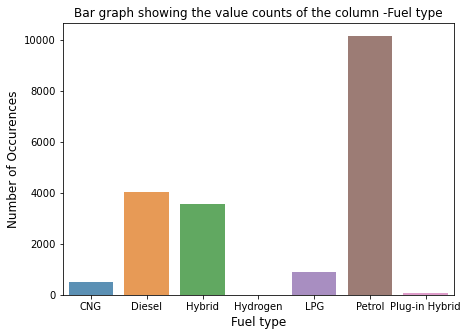

In [48]:
plt.figure(figsize=(7,5))
sns.barplot(fuel_count.index, fuel_count.values, alpha = 0.8)
plt.title('Bar graph showing the value counts of the column -Fuel type')
plt.ylabel('Number of Occurences', fontsize = 12)
plt.xlabel('Fuel type', fontsize = 12)
plt.show()

***From the above graph, there is no sufficient data for the fuel types - Hydrogen and Plug-in Hybrid.***

In [50]:
# Mean price per each Fuel type

In [53]:
mean_price_fuel = dataset[['Fuel type', 
                           'Price']].groupby('Fuel type', 
                                                         as_index = False).mean()
mean_price_fuel

,Fuel type,Price
0,CNG,8509.591093
1,Diesel,30631.071358
2,Hybrid,10849.320570
3,Hydrogen,20385.000000
4,LPG,13309.438341
5,Petrol,17377.351527
6,Plug-in Hybrid,23700.453488


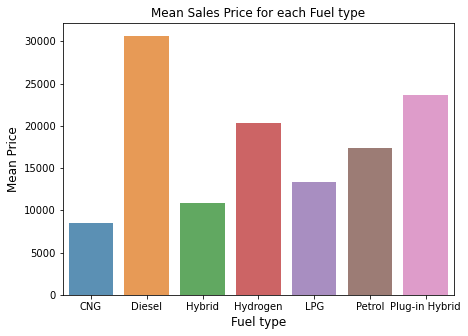

In [55]:
plt.figure(figsize = (7,5))
sns.barplot(mean_price_fuel['Fuel type'], 
           mean_price_fuel['Price'], alpha = 0.8)
plt.title('Mean Sales Price for each Fuel type')
plt.ylabel('Mean Price', fontsize = 12)
plt.xlabel('Fuel type', fontsize = 12)
plt.show()

## Gear box type

In [56]:
gear_count = dataset['Gear box type'].value_counts(dropna = False)
gear_count

Automatic    13514
Tiptronic     3102
Manual        1875
Variator       746
Name: Gear box type, dtype: int64

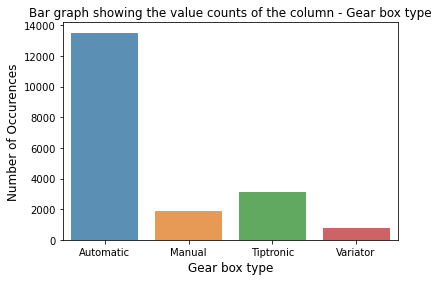

In [58]:
sns.barplot(gear_count.index, gear_count.values, alpha = 0.8)
plt.title('Bar graph showing the value counts of the column - Gear box type')
plt.ylabel('Number of Occurences', fontsize = 12)
plt.xlabel('Gear box type', fontsize = 12)
plt.show()

***From the above graph, we can see that most of the cars have an automatic gear box type***

In [59]:
mean_price_gear = dataset[['Gear box type',
                           'Price']].groupby('Gear box type', 
                                            as_index = False).mean()
mean_price_gear

,Gear box type,Price
0,Automatic,15974.326032
1,Manual,25614.896533
2,Tiptronic,26448.307221
3,Variator,14762.399464


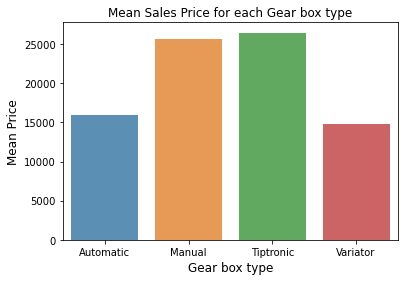

In [60]:
sns.barplot(mean_price_gear['Gear box type'], mean_price_gear['Price'], alpha = 0.8)
plt.title('Mean Sales Price for each Gear box type')
plt.ylabel('Mean Price', fontsize = 12)
plt.xlabel('Gear box type', fontsize = 12)
plt.show()

***From the above graph, we can see that automatic, variator have similar price. Similarly, the cars having manual, tiptronic have similar price.***

## Drive wheels

In [61]:
### Value counts of the column - Drive wheels

In [62]:
drive_count = dataset['Drive wheels'].value_counts(dropna = False)
drive_count

Front    12874
4x4       4058
Rear      2305
Name: Drive wheels, dtype: int64

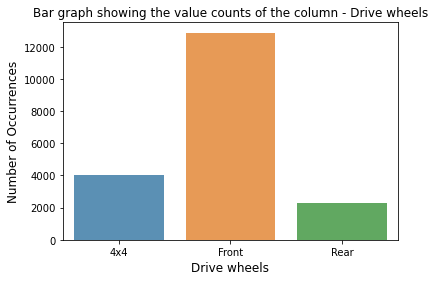

In [63]:
sns.barplot(drive_count.index, drive_count.values, alpha = 0.8)
plt.title('Bar graph showing the value counts of the column - Drive wheels')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Drive wheels', fontsize = 12)
plt.show()

***From the above graph, we can see that most of the cars have Front drive wheels.****

In [64]:
mean_price_drive = dataset[['Drive wheels', 'Price']].groupby('Drive wheels', as_index = False).mean()
mean_price_drive

,Drive wheels,Price
0,4x4,19535.423854
1,Front,18491.339055
2,Rear,17192.244252


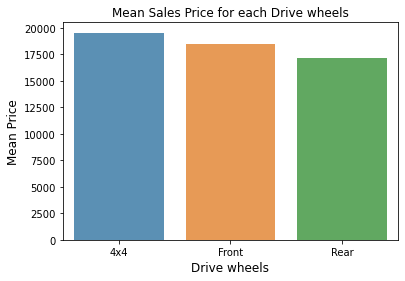

In [65]:
sns.barplot(mean_price_drive['Drive wheels'], mean_price_drive['Price'], alpha = 0.8)
plt.title('Mean Sales Price for each Drive wheels')
plt.ylabel('Mean Price', fontsize = 12)
plt.xlabel('Drive wheels', fontsize = 12)
plt.show()

***From the above graph, we can see that the mean sales price of all the drive wheels is similar.***

## Color

In [66]:
color_count = dataset['Color'].value_counts(dropna = False)
color_count

Black            5033
White            4489
Silver           3792
Grey             2375
Blue             1396
Red               639
Green             322
Orange            253
Brown             187
Carnelian red     179
Golden            145
Beige             134
Sky blue          122
Yellow            106
Purple             39
Pink               26
Name: Color, dtype: int64

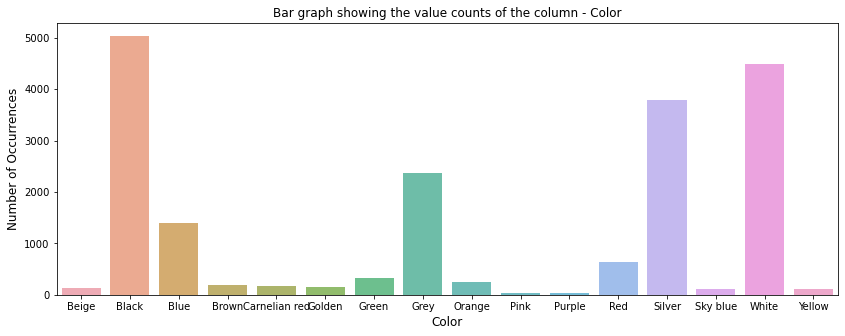

In [67]:
plt.figure(figsize = (14, 5))
sns.barplot(color_count.index, color_count.values, alpha = 0.8)
plt.title('Bar graph showing the value counts of the column - Color')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Color', fontsize = 12)
plt.show()

***From the above graph, we can see that most of the colors of the cars have insufficient data.***

In [68]:
mean_price_color = dataset[['Color', 'Price']].groupby('Color', as_index = False).mean()
mean_price_color

,Color,Price
0,Beige,15627.559701
1,Black,18886.917346
2,Blue,33726.850287
3,Brown,19709.636364
4,Carnelian red,15820.927374
5,Golden,14678.551724
6,Green,9449.677019
7,Grey,19203.448000
8,Orange,13008.422925
9,Pink,10649.076923


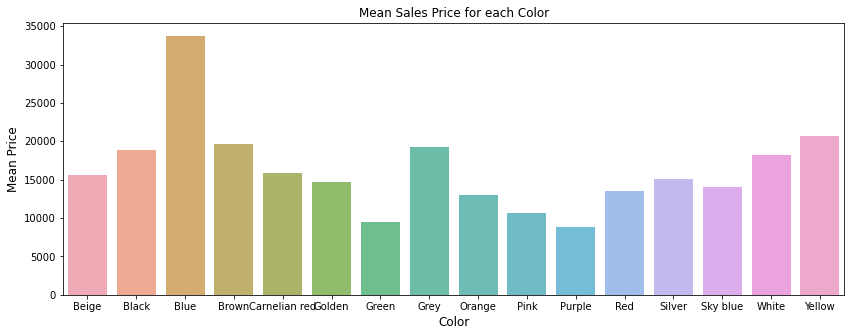

In [69]:
plt.figure(figsize = (14, 5))
sns.barplot(mean_price_color['Color'], mean_price_color['Price'], alpha = 0.8)
plt.title('Mean Sales Price for each Color')
plt.ylabel('Mean Price', fontsize = 12)
plt.xlabel('Color', fontsize = 12)
plt.show()